# Marine HeatWaves Def

In [1]:
# Load required modules
import numpy as np
import os
import glob
from importlib import reload

from datetime import date
from matplotlib import pyplot as plt

# Load marineHeatWaves definition module
import marineHeatWaves as mhw

# Iris
import iris
#import iris.plot as iplt
from iris import quickplot

In [2]:
%matplotlib notebook

# Setup

In [3]:
noaa_path = '/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/'

In [4]:
all_sst_files = glob.glob(noaa_path+'sst*nc')
all_sst_files.sort()

# Marine Heatwave Detection

## Case study #1: 2011 Western Australia event

### Load up

In [5]:
file_1982 = os.path.join(noaa_path, 'sst.day.mean.1982.nc')
cubes_1982 = iris.load(file_1982)
sst_1982 = cubes_1982[0]
sst_1982

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 365; latitude: 720; longitude: 1440)>

In [6]:
WA_constraint = iris.Constraint(latitude=lambda cell: -30 < cell < -29., longitude=lambda cell: 112. < cell < 113)

In [7]:
WA_sst_1982 = sst_1982.extract(WA_constraint)

In [8]:
WA_sst_1982

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (time: 365; latitude: 4; longitude: 4)>

In [9]:
WA_sst_1982.has_lazy_data()

True

In [10]:
WA_sst_1982.shape

(365, 4, 4)

In [11]:
WA_1982_T = WA_sst_1982.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)

/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [12]:
WA_1982_T.shape

(365,)

In [13]:
WA_sst_1982.has_lazy_data()

True

<IPython.core.display.Javascript object>


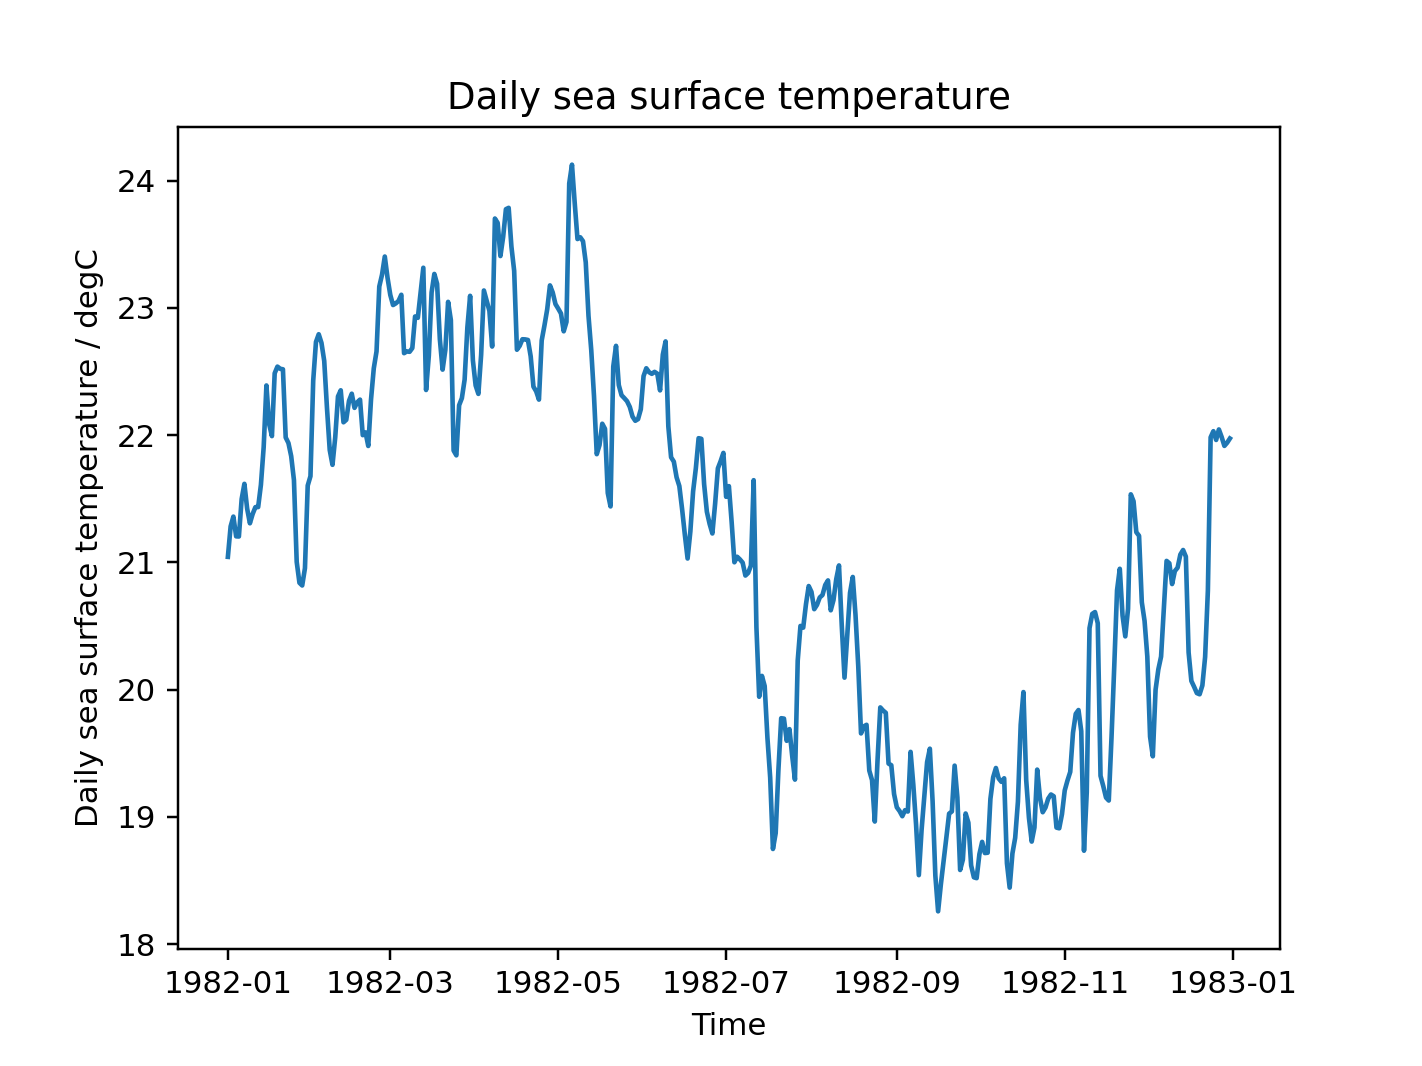

In [14]:
quickplot.plot(WA_1982_T)
plt.show()

### Get am all -- 1982 - 2014 inclusive

In [15]:
WA_constraint = iris.Constraint(latitude=lambda cell: -30 < cell < -29., longitude=lambda cell: 112. < cell < 113)

In [16]:
t = []
SSTs = []
for ifile in all_sst_files[1:-5]:
    print(ifile)
    cubes = iris.load(ifile)
    sst = cubes[0]
    #
    WA_sst = sst.extract(WA_constraint)
    WA_T = WA_sst.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)
    # Append
    t += (WA_T.coord('time').points + 657072).astype(int).tolist()  # 1880?
    SSTs += WA_T.data.tolist()
#
t = np.array(t)
SSTs = np.array(SSTs)

/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1982.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1983.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1984.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1985.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1986.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1987.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1988.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1989.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1990.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1991.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1992.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1993.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1994.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1995.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1996.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1997.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1998.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.1999.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2000.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2001.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2002.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2003.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2004.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2005.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2006.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2007.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2008.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2009.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2010.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2011.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2012.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2013.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/sst.day.mean.2014.nc


/home/xavier/anaconda3/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [17]:
SSTs.size, t.size

(12053, 12053)

In [18]:
reload(mhw)
mhws, clim = mhw.detect(t, SSTs, joinAcrossGaps=True)

In [19]:
mhws['n_events']

57

In [20]:
mhws['intensity_max'][0:10]

[1.6078297162409818,
 1.309397370234965,
 1.5817403514512591,
 1.9491975983121606,
 2.0015776022417313,
 1.4840863232166441,
 1.6497724497995243,
 1.5743514374289198,
 1.727891305536847,
 1.9466197043432203]

### Examine the most intense

In [21]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 6.22095919066426 deg. C
Average intensity: 3.215606582610754 deg. C
Cumulative intensity: 192.93639495664524 deg. C-days
Duration: 60 days
Start date: 07 February 2011
End date: 07 April 2011


### Exploring further

In [22]:
dates = [date.fromordinal(tt.astype(int)) for tt in t]

In [23]:
dates[-1]

datetime.date(2014, 12, 31)

<IPython.core.display.Javascript object>


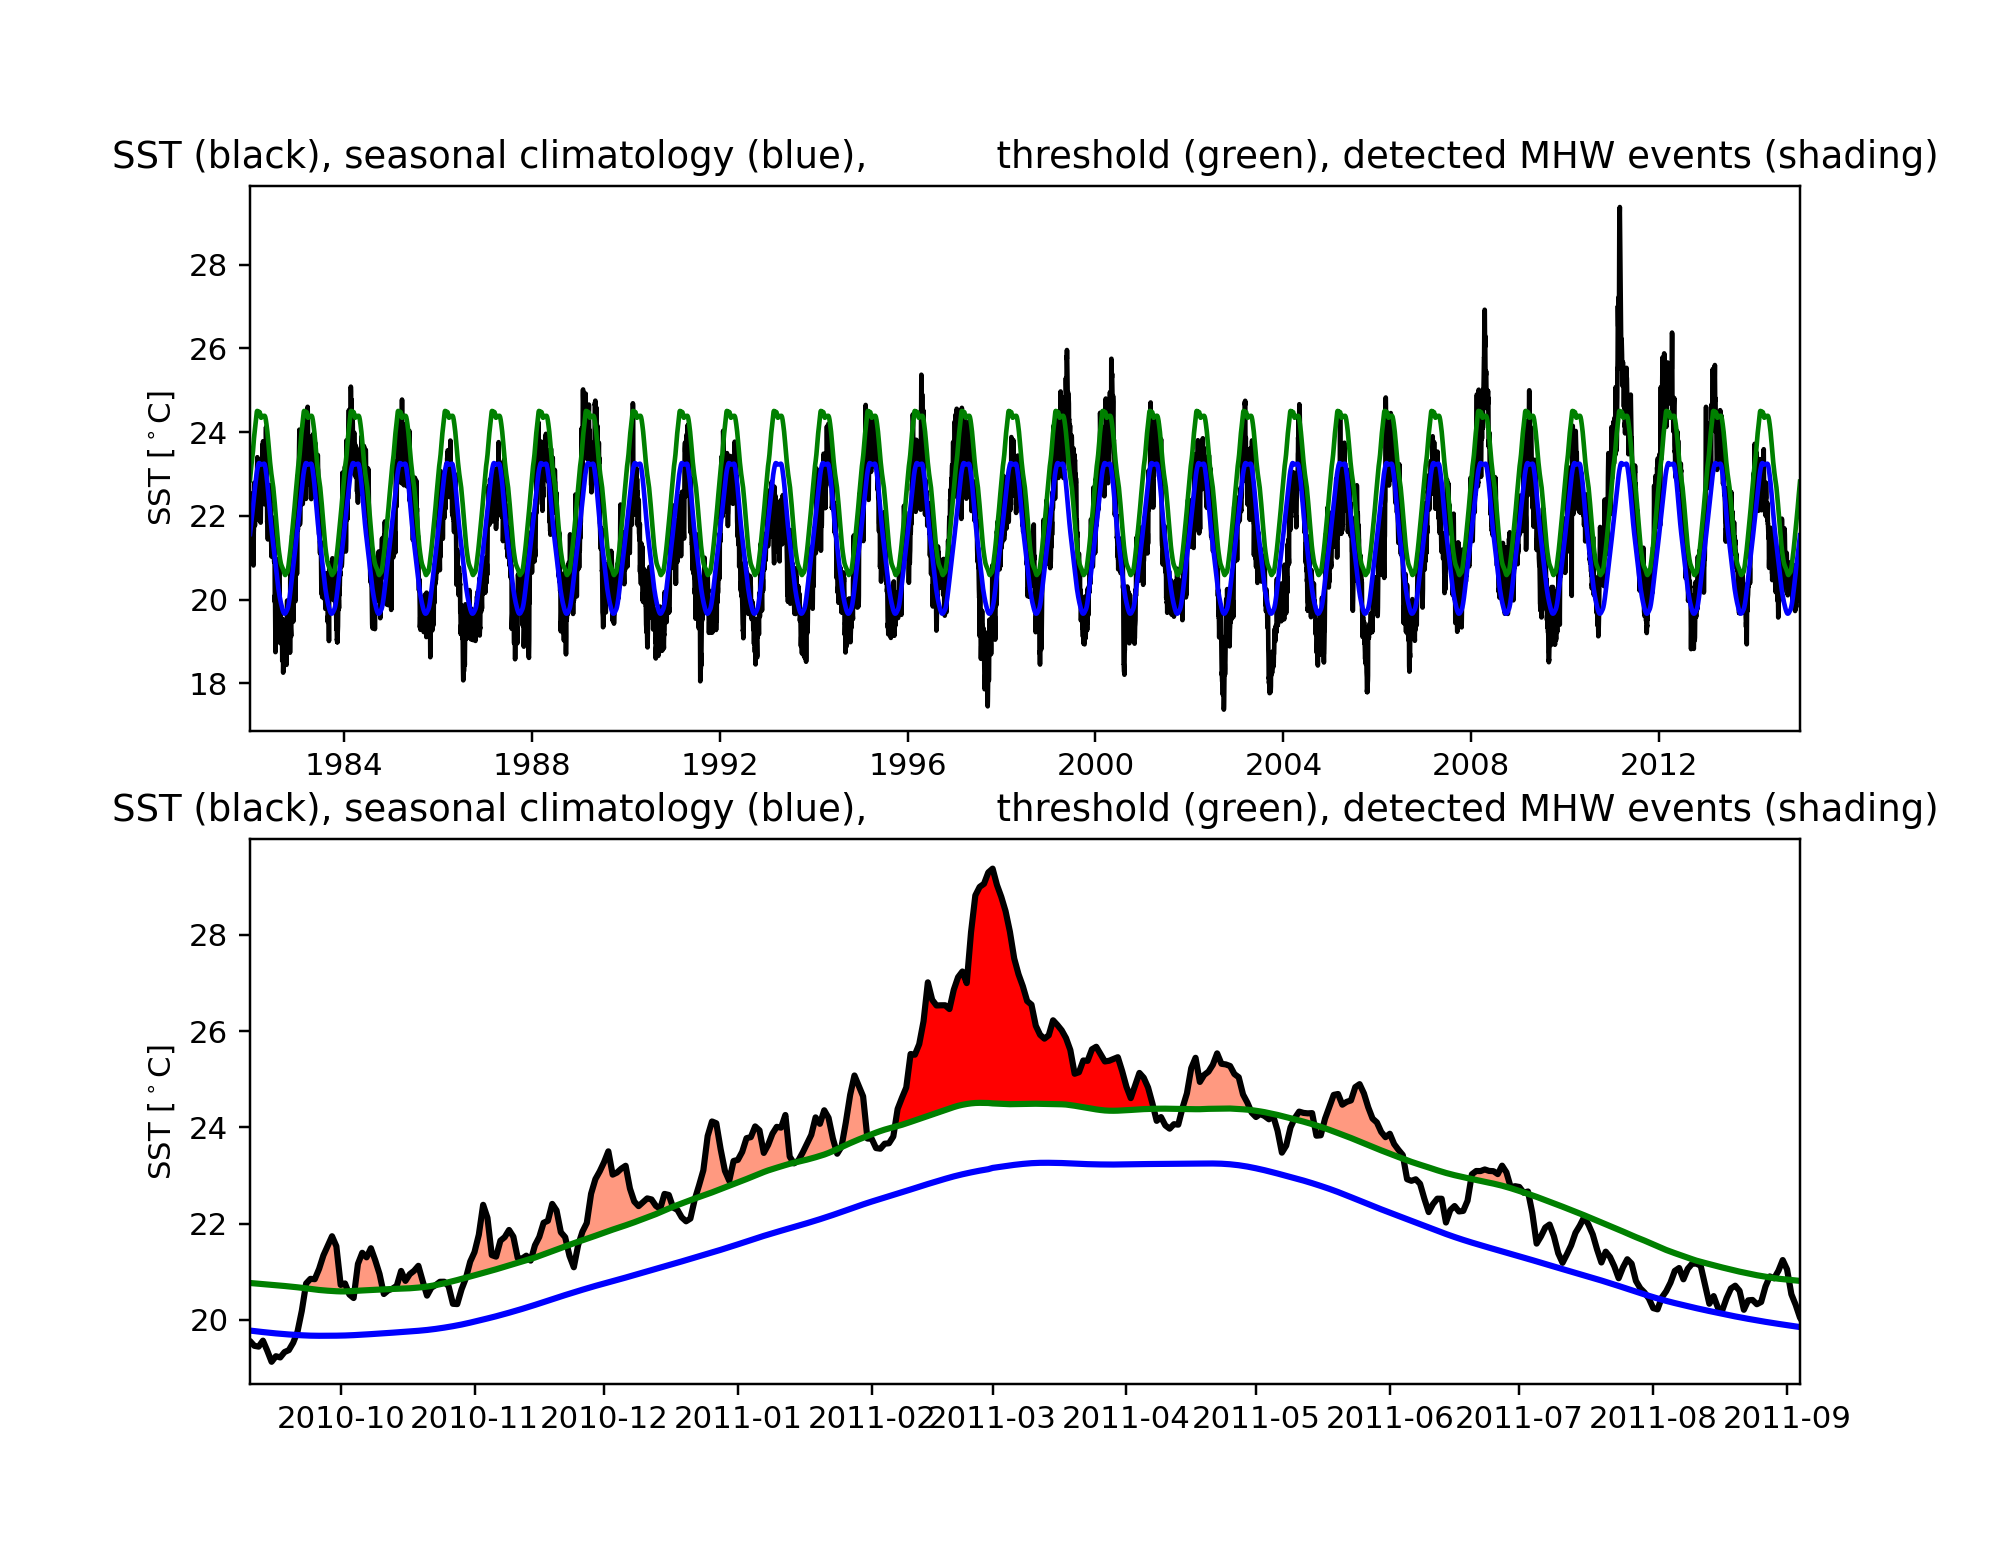

Text(0, 0.5, 'SST [$^\\circ$C]')

In [24]:
sst = SSTs
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(t[0], t[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest (2011 WA event) and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(mhws['time_start'][ev]-150, mhws['time_end'][ev]+150)
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')

----

# Testing